### ATM 240 - Plotting Wind Data

In [2]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from numpy import genfromtxt
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter

In [6]:
filename = '/spare11/atm240/PENN_YAN_1JULY2017.txt' 
ff = genfromtxt(filename, skip_header=1)
ff

array([[0.000000e+00, 2.665002e+00, 2.932877e+02],
       [3.000000e+00, 2.617141e+00, 2.981202e+02],
       [6.000000e+00, 2.833939e+00, 3.052609e+02],
       ...,
       [8.639100e+04, 3.553036e+00, 2.763035e+02],
       [8.639400e+04, 3.301740e+00, 2.802759e+02],
       [8.639700e+04, 3.229919e+00, 2.712083e+02]])

In [3]:
'''
[first lines of PENN_YAN_1JULY2017.txt]   

time (s)  wspd      wdir
0         2.665002  293.2877
3         2.617141  298.1202
6         2.833939  305.2609
9         2.680921  304.7292
12        2.514335  296.501
'''

filename = '/spare11/atm240/PENN_YAN_1JULY2017.txt' 
ff = genfromtxt(filename, skip_header=1)

date=ff[:,0]     # the first (zeroth) column is time in seconds from start of day
wind=ff[:,1]     # the second (oneth) column is wind speed in m/s
wdir=ff[:,2]     # the third (twoth) column is wind direction in degrees

# how many observations?
print(' we have ',len(wind),' observations')

# what are the max and min values
print(' max wind speed = ',np.max(wind))
print(' min wind speed = ',np.min(wind))
print(' std dev wind speed = ',np.std(wind))

 we have  28800  observations
 max wind speed =  14.31316
 min wind speed =  0.0
 std dev wind speed =  1.4861452955210925


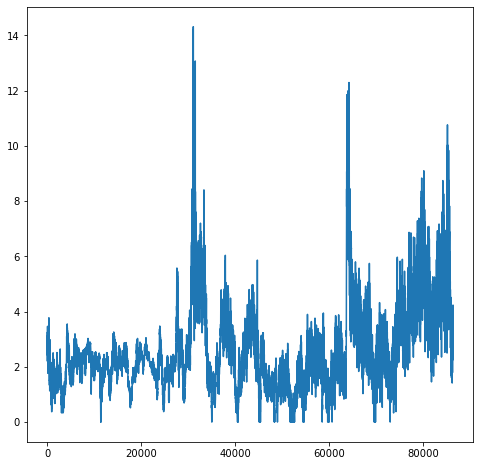

In [3]:
# make a rudimentary plot

fig = plt.figure(figsize=(8,8))   # requests a figure object of a specified (here, square) size
plt.plot(date,wind)

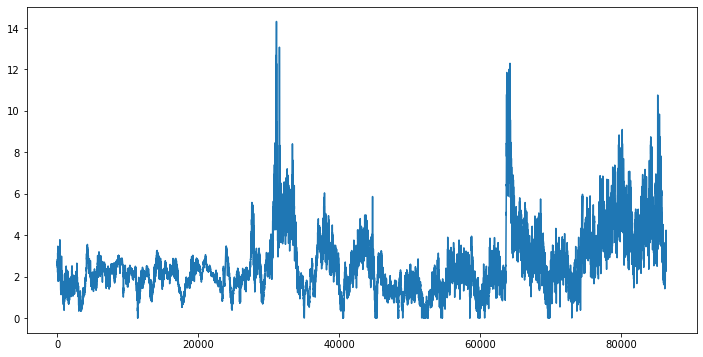

In [4]:
# change the aspect ratio to more rectangular

fig = plt.figure(figsize=(12,6))  # aspect ratio is horizontal x vertical
plt.plot(date,wind)

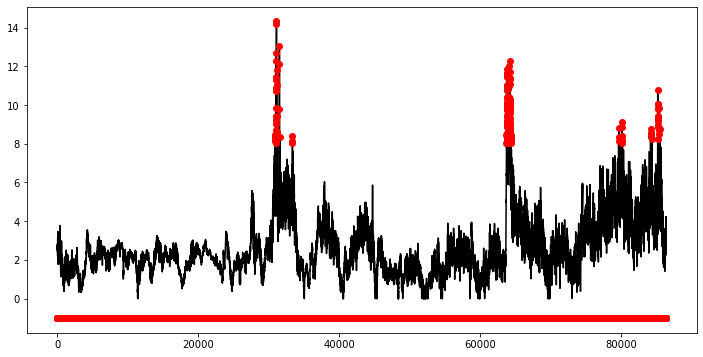

In [8]:
# create a new array - high_wind1 - highlighting where wind speed > 8 m/s

high_wind1 = np.zeros_like(wind)        # initializing an array mimicking wind but containing zeroes

for i in range(len(wind)):
    if(wind[i] > 8.):
        high_wind1[i] = wind[i]         # wind > 8, so high_wind1 = wind
    else:
        high_wind1[i] = -1.             # wind <= 8, so high_wind1 = -1
    #
#

# plot high_wind1 as a scatterplot on top of wind.  dots will be red.  zorder=[large #] forces plot to top

fig = plt.figure(figsize=(12,6))
plt.plot(date,wind,c='k')
plt.scatter(date,high_wind1,c='r',zorder=10)

(0.0, 15.744476)

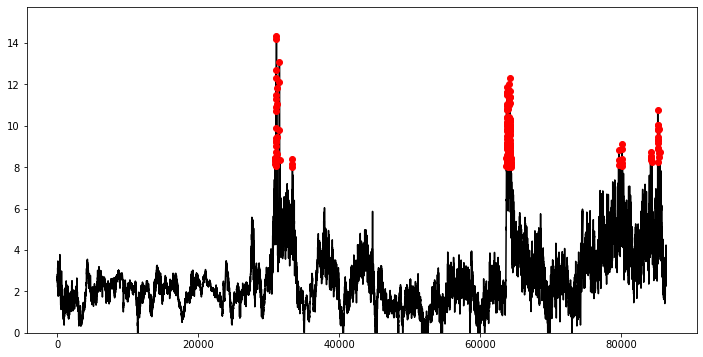

In [9]:
# the negative numbers are distracting.  Control the vertical axis of the plot with plt.ylim([min,max])
# this will obscure where high_wind1 = -1

fig = plt.figure(figsize=(12,6))
plt.plot(date,wind,c='k')
plt.scatter(date,high_wind1,c='r',zorder=10)

plt.ylim([0,np.max(wind)*1.1])    # max limit for y-axis will be 10% larger than max wind, for headroom

(0.0, 15.744476)

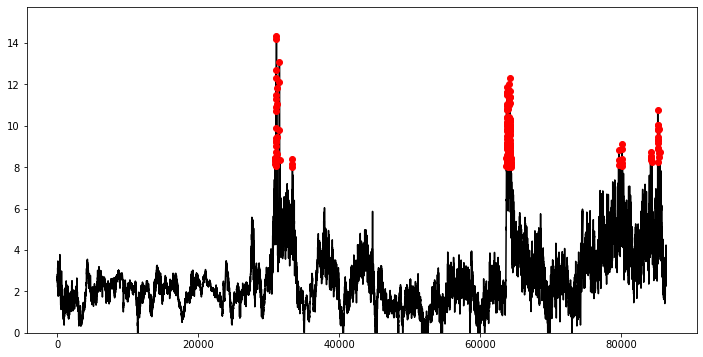

In [10]:
# Easier way to create the high wind subset:
#  use np.where to more compactly identify which elements of wind match the specified criteria,
#    replacing that for/if/else code above
#  note we wind up with the same plot, which is what we wanted

high_wind2 = np.where(wind>8,wind,-1)  # if wind > 8, high_wind2=wind, otherwise it's -1


fig = plt.figure(figsize=(12,6))
plt.plot(date,wind,c='k')
plt.scatter(date,high_wind2,c='r',zorder=10)

plt.ylim([0,np.max(wind)*1.1])

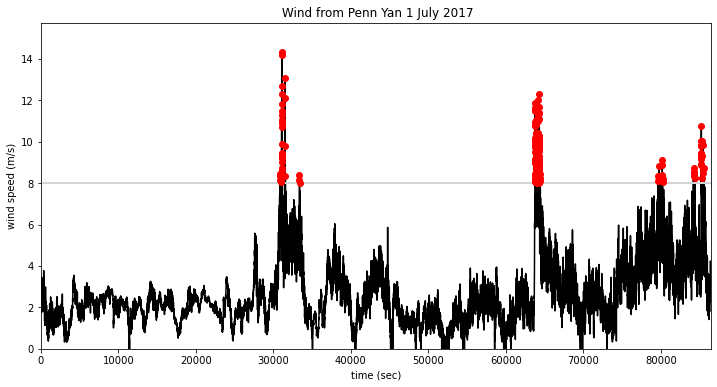

In [11]:
# are we ready for some titles and other adjustments?
# - plt.xlim is added for control of x-axis
# - title and y and x axis labels added
# - draw a light grey line at y=8 to further demark higher wind speeds
# - save the figure to a PNG file

fig = plt.figure(figsize=(12,6))
plt.plot(date,wind,c='k')
plt.scatter(date,high_wind2,c='r',zorder=10)

plt.ylim([0,np.max(wind)*1.1])
plt.xlim([0,np.max(date)])

plt.axhline(y=8, lw=2,c='lightgrey')               # draw horizontal line (hline), linewidth=2, color lightgrey 

plt.title(' Wind from Penn Yan 1 July 2017')
plt.xlabel('time (sec)')
plt.ylabel('wind speed (m/s)')

# save a figure, and cut out some whitespace with bbox_inches = 'tight'
plt.savefig("pennyan_wind_plot.png", bbox_inches = 'tight')

(0.0, 86397.0)

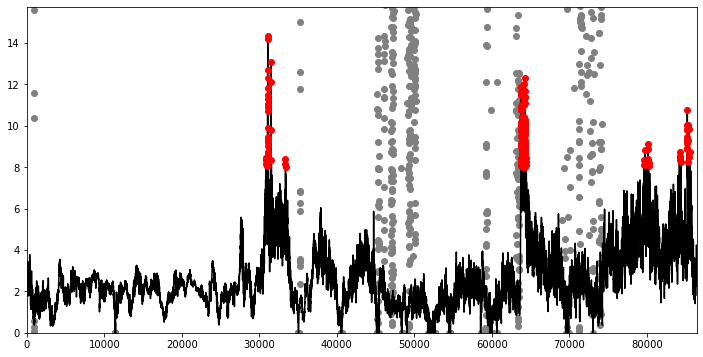

In [12]:
# Often we like to have wind direction on the plot as well.  Let's add that

fig = plt.figure(figsize=(12,6))
plt.plot(date,wind,c='k')
plt.scatter(date,high_wind2,c='r',zorder=10)
plt.scatter(date,wdir,c='grey')

plt.ylim([0,np.max(wind)*1.1])
plt.xlim([0,np.max(date)])

(0.0, 86397.0)

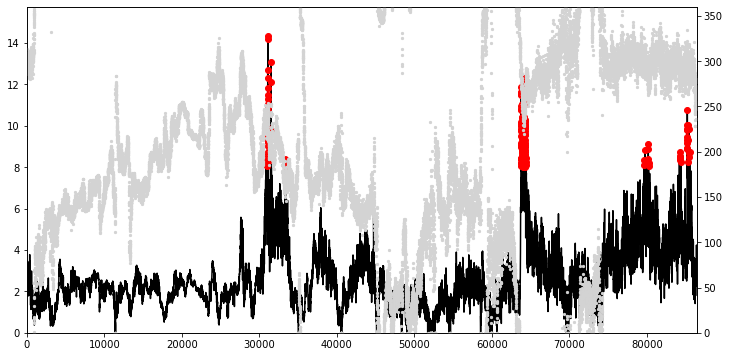

In [13]:
# That did not work out well because wind direction has a vastly different scale than wind speed
#  and we already tailored our plot to wind speed

# Instead, we can add wind direction as a secondary y-axis but this requires a somewhat different approach

# Now we are creating figure (fig) and axis (ax1) objects via the subplots command

fig, ax1 = plt.subplots(figsize=(12,6))

# our usual plots...
plt.plot(date,wind,c='k')
plt.scatter(date,high_wind2,c='r',zorder=10)
plt.ylim([0,np.max(wind)*1.1])

# the twinx command clones the ax1 axis object as ax2, so our new plot shares the same x-axis
ax2 = ax1.twinx()

# now we plot wind direction, and ask for a different, more reasonable y-axis plot limits
# this plot shows up on the secindary y-axis at right
plt.scatter(date,wdir,c='lightgrey',s=5)    # those wind direction dots were too large so we're downsizing
plt.ylim([0,360])

# enforce the x-axis plot limits for both series
plt.xlim([0,np.max(date)])


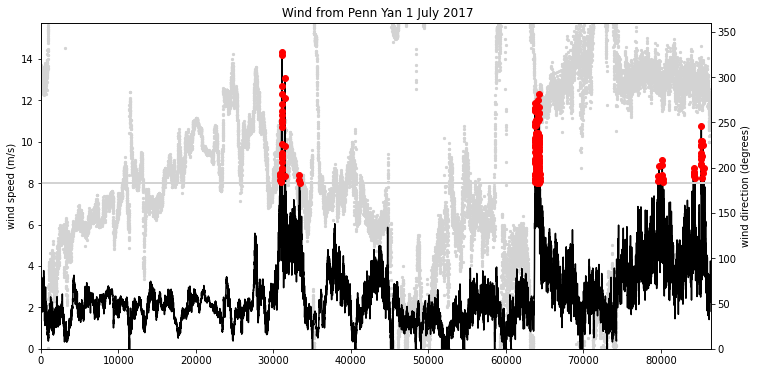

In [19]:
# Much better but I'd really like the wind direction series to be plotted last, at the bottom.
# The last two lines before savefig below manage to do that.  We'll explore what this means later
# I also restored some other stuff: labels, title, horizontal line

fig, ax1 = plt.subplots(figsize=(12,6))

# our usual plots...
plt.plot(date,wind,c='k')
plt.scatter(date,high_wind2,c='r',zorder=10)
plt.ylim([0,np.max(wind)*1.1])
plt.ylabel('wind speed (m/s)')
plt.axhline(y=8, lw=2,c='lightgrey') 

# the twinx command clones the ax1 axis object as ax2, so our new plot shares the same x-axis
ax2 = ax1.twinx()

# now we plot wind direction, and ask for a different, more reasonable y-axis plot limits
plt.scatter(date,wdir,c='lightgrey',s=5)
plt.ylim([0,360])
plt.ylabel('wind direction (degrees)')

# enforce the x-axis plot limits and plot x-axis label
plt.xlim([0,np.max(date)])
plt.xlabel('time (sec)')

# title
plt.title(' Wind from Penn Yan 1 July 2017')


# force the second y-axis' series to be plotted at the bottom (by actually forcing primary y-axis series to top)
# https://stackoverflow.com/questions/38687887/how-to-define-zorder-when-using-2-y-axis
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)

plt.savefig("pennyan_wind_plot_improved.png", bbox_inches = 'tight')